## Import libraries


In [183]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV , train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler # i won't balance cause i think the data is not that bad
#and whatever you need

## KNN Implementation


In [26]:
class KNNClassifier:
    def __init__(self, k):
        self.k = k
    def fit(self, X, y):
        self.X = X.to_numpy()
        self.Y = y.to_numpy()

    def predict(self, X):
        X_test = X.to_numpy() 
        predictions = []

        for x_test in X_test:

            distances = np.linalg.norm(self.X - x_test, axis=1)

            k_indices = np.argsort(distances)[:self.k]

            k_nearest_labels = self.Y[k_indices]


            most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]

            predictions.append(most_common_label)

        return predictions


## Load and preprocess

#### TO DO:

###### 1-Load data

###### 2-Sample equal number of samples from each class. find a reasonable number.

###### 3-Encode categorical values

###### 4-Keep these columns and drop the rest : grade, term, home_ownership, emp_length

###### 5-Split data to train, validation and test set

###### 6-Scale the data(normalization)

###### 7-The target column is "bad_loans"


In [163]:
def balancer(X , y):
    undersampler = RandomUnderSampler(sampling_strategy='auto' ,random_state=42)

    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    # df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['bad_loans'])], axis=1)
    print (X_resampled['term'].value_counts())
    return X_resampled , y_resampled

def load_and_preprocess_data(path):
    # data = pd.read_csv('./loan_sub.csv' , sep=',', low_memory=False)
    # data.drop(['id' , 'member_id'] , axis=1 , inplace=True)
    
    # data = pd.read_csv('./loan_sub.csv' , sep=',', low_memory=False , usecols=['bad_loans' , 'loan_amnt' , 'term' , 'int_rate' , 'grade' , 'home_ownership' , 'annual_inc' , 'is_inc_v' , 'issue_d' , 'loan_status' , 'total_acc'])
    data = pd.read_csv('./loan_sub.csv' , sep=',', low_memory=False , usecols=['bad_loans' , 'emp_length' , 'term'  , 'grade' , 'home_ownership' ])
    data = data.dropna().reset_index(drop= True)
    y = data['bad_loans']
    data.drop(['bad_loans'] , axis = 1 , inplace= True)
    # print (data['term'].value_counts())
    # data['loan_status'] = data.loan_status.map ({'Fully Paid':'Fully Paid' ,'Charged Off':'Charged Off' , 'Default':'Default', 'Does not meet the credit policy.  Status:Charged Off': 'Charged Off' ,  'Does not meet the credit policy.  Status:Fully Paid': 'Fully Paid'} ).astype(object)
    data ['grade'] = data.grade.map({'A' : 0 , 'B': 1 , 'C': 2 , 'D': 3 ,'E':4 , 'F' : 5, 'G': 6}).astype(int)
    data ['term'] = data.term.map({' 36 months': 0 , ' 60 months':1 }).astype(int)
    # data['is_inc_v'] = data.is_inc_v.map({'Verified':1 , 'Source Verified': 1, 'Not Verified':0}).astype(int)
    
    # encoder = OneHotEncoder(sparse_output=False)
    # encoded_array = encoder.fit_transform(data[['home_ownership' , 'loan_status']])
    # encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['home_ownership' , 'loan_status']))
    # data = data.drop(columns=['home_ownership' , 'loan_status'])
    # data = pd.concat([data, encoded_df], axis=1)

    data ['emp_length'] = data.emp_length.map({'10+ years': 15, '< 1 year': 0.5 , '3 years' : 3, '9 years': 9, '4 years':4 , '5 years':5, '1 year':1, '6 years':6, '2 years':2, '7 years':7, '8 years':8}).astype(float)

    # print (len(data))
    encoder = OneHotEncoder(sparse_output=False)
    encoded_array = encoder.fit_transform(data[['home_ownership' ]])
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['home_ownership' ]))
    data = pd.concat([data, encoded_df], axis=1)
    data = data.drop(columns=['home_ownership'])
    # print (len(data))
    # data['issue_d'] = pd.to_datetime(data['issue_d'])
    
    # print (len(y))
    data , y = balancer(data , y)
    x_train , x_test , y_train , y_test = train_test_split(data , y , test_size=0.15)
    x_train , x_val , y_train , y_val = train_test_split(x_train , y_train , test_size=0.1)
    # min_date = x_train['issue_d'].min()
    # x_train['issue_d'] = (x_train['issue_d'] - min_date).dt.days
    # max_date = x_train['issue_d'].max()
    # x_train['issue_d'] = x_train['issue_d'] / max_date
    # x_test['issue_d'] = (x_test['issue_d'] - min_date).dt.days
    # x_test['issue_d'] = x_test['issue_d'] / max_date
    
    # min_loan = x_train['loan_amnt'].min()
    # max_loan = x_train['loan_amnt'].max()
    # x_train['loan_amnt'] = (x_train['loan_amnt'] - min_loan)
    # x_train['loan_amnt'] = x_train['loan_amnt'] / max_loan
    # x_test['loan_amnt'] = (x_test['loan_amnt'] - min_loan)
    # x_test['loan_amnt'] = x_test['loan_amnt'] / max_loan

    # min_income = x_train['annual_inc'].min()
    # max_income = x_train['annual_inc'].max()
    # x_train['annual_inc'] = (x_train['annual_inc'] - min_income)
    # x_train['annual_inc'] = x_train['annual_inc'] / max_income
    # x_test['annual_inc'] = (x_test['annual_inc'] - min_income)
    # x_test['annual_inc'] = x_test['annual_inc'] / max_income

    # min_total_acc = x_train['total_acc'].min()
    # max_total_acc = x_train['total_acc'].max()
    # x_train['total_acc'] = (x_train['total_acc'] - min_total_acc)
    # x_train['total_acc'] = x_train['total_acc'] / max_total_acc
    # x_test['total_acc'] = (x_test['total_acc'] - min_total_acc)
    # x_test['total_acc'] = x_test['total_acc'] / max_total_acc

    # min_int_rate = x_train['int_rate'].min()
    # max_int_rate = x_train['int_rate'].max()
    # x_train['int_rate'] = (x_train['int_rate'] - min_int_rate)
    # x_train['int_rate'] = x_train['int_rate'] / max_int_rate
    # x_test['int_rate'] = (x_test['int_rate'] - min_int_rate)
    # x_test['int_rate'] = x_test['int_rate'] / max_int_rate

    min_grade = x_train['grade'].min()
    max_grade = x_train['grade'].max()
    x_train['grade'] = (x_train['grade'] - min_grade)
    x_train['grade'] = x_train['grade'] / max_grade
    x_test['grade'] = (x_test['grade'] - min_grade)
    x_test['grade'] = x_test['grade'] / max_grade
    x_val['grade'] = (x_val['grade'] - min_grade)
    x_val['grade'] = x_val['grade'] / max_grade

    min_emp_length = x_train['emp_length'].min()
    max_emp_length = x_train['emp_length'].max()
    x_train['emp_length'] = (x_train['emp_length'] - min_emp_length)
    x_train['emp_length'] = x_train['emp_length'] / max_emp_length
    x_test['emp_length'] = (x_test['emp_length'] - min_emp_length)
    x_test['emp_length'] = x_test['emp_length'] / max_emp_length
    x_val['emp_length'] = (x_val['emp_length'] - min_emp_length)
    x_val['emp_length'] = x_val['emp_length'] / max_emp_length


    return x_train, x_test,x_val ,y_train, y_test, y_val


#### Training functions


In [188]:
def train_decision_tree(X_train, y_train, d):  
    haha = DecisionTreeClassifier(criterion='gini', max_depth = d, random_state=42)  
    haha.fit(X_train , y_train)
    return haha

# Function to train KNN classifier
def train_knn(X_train, y_train, k):
    haha = KNNClassifier (k)
    haha.fit (X_train , y_train)
    
    return haha

def train_adaboost(X_train, y_train, n):
    base_estimator_ = DecisionTreeClassifier(max_depth=1)  # Weak learner (stump)
    adaboost_model = AdaBoostClassifier(estimator=base_estimator_, n_estimators=n, learning_rate=1.0, random_state=42)

    # Train the model
    adaboost_model.fit(X_train, y_train)
    return adaboost_model

def train_rf(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200], 
        'max_depth': [5 , 10, None],     
        'min_samples_split': [2, 5, 10],   
        'criterion': ['gini', 'entropy']    
    }

    rf = RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                               scoring='f1', cv=5, n_jobs=-1, verbose=1)

    grid_search.fit(X_train, y_train)
    best_rf = grid_search.best_estimator_
    return best_rf

In [165]:
def compare_models(dt_accuracy, knn_accuracy, ab_accuracy, rf_accuracy):
    models = ['Decision Tree', 'KNN','Adaboost', 'Random Forest']
    accuracies = [dt_accuracy, knn_accuracy, ab_accuracy,rf_accuracy]

    plt.figure(figsize=(8, 6))
    plt.bar(models, accuracies)
    plt.title('Model Comparison - Test Accuracy')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
    plt.show()

## The main function

#### TO DO:

###### Use the defined functions to load the dataset and train the models.

###### You should optimize the hyperparameters. Maximum depth for DT and k for KNN and n_estimators for Adaboost.

###### Find the best DT, KNN, Adaboost and RF model and report the test accuracy.


In [197]:

# def main():
#     ## your code goes here ##
#     compare_models(dt_test_acc, knn_test_acc, ab_test_acc, rf_test_acc)

#     plt.figure(figsize=(60,36))
#     plot_tree(best_dtmodel, 
#             feature_names=columns, 
#             class_names=["0", "1"],       
#             filled=True,
#             rounded=True,
#             fontsize=8
#             )
#     plt.show()


# if __name__ == "__main__":
#     main()

In [164]:
x_train, x_test,x_val, y_train, y_test, y_val = load_and_preprocess_data('./loan_sub.csv')


x_train

term
0    32882
1    11214
Name: count, dtype: int64


,term,grade,emp_length,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
18888,0,0.000000,0.300000,0.0,0.0,0.0,1.0
36863,0,0.166667,0.000000,0.0,0.0,0.0,1.0
47100,0,0.166667,0.433333,0.0,0.0,0.0,1.0
85755,0,0.000000,0.966667,1.0,0.0,0.0,0.0
67453,1,0.333333,0.100000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
29865,0,0.166667,0.166667,0.0,0.0,0.0,1.0
112911,1,0.333333,0.566667,0.0,0.0,0.0,1.0
38010,1,0.666667,0.966667,1.0,0.0,0.0,0.0
75002,0,0.666667,0.566667,0.0,0.0,0.0,1.0


In [196]:
haha = KNNClassifier (15)
haha.fit (x_train , y_train)
y_predict = haha.predict(x_test)
accuracy_score (y_predict , y_test)

0.598337112622827

In [178]:
dt_model = train_decision_tree(x_train , y_train, 6)
y_predict = dt_model.predict(x_test)
accuracy_score (y_predict , y_test)

0.6261526832955404

In [201]:
a_model = train_adaboost(x_train , y_train , 100)
y_predict = a_model.predict(x_test)
accuracy_score (y_predict , y_test)

/usr/lib/python3/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.6253968253968254

In [189]:
rf_model = train_rf (x_train , y_train)
y_predict = rf_model.predict(x_test)
accuracy_score (y_predict , y_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


0.6253968253968254

In [130]:
y_train.value_counts()

bad_loans
1    16875
0    16857
Name: count, dtype: int64

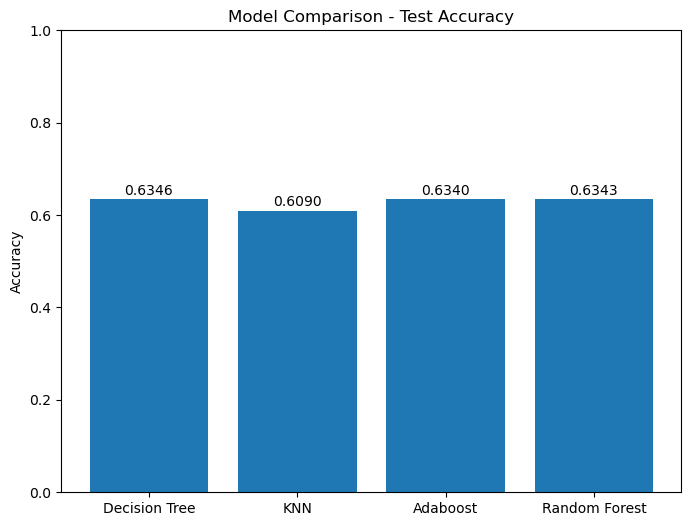

In [202]:
compare_models(accuracy_score(dt_model.predict(x_val) , y_val) , accuracy_score(haha.predict(x_val) , y_val) , accuracy_score(a_model.predict(x_val) , y_val) , accuracy_score(rf_model.predict(x_val) , y_val) )

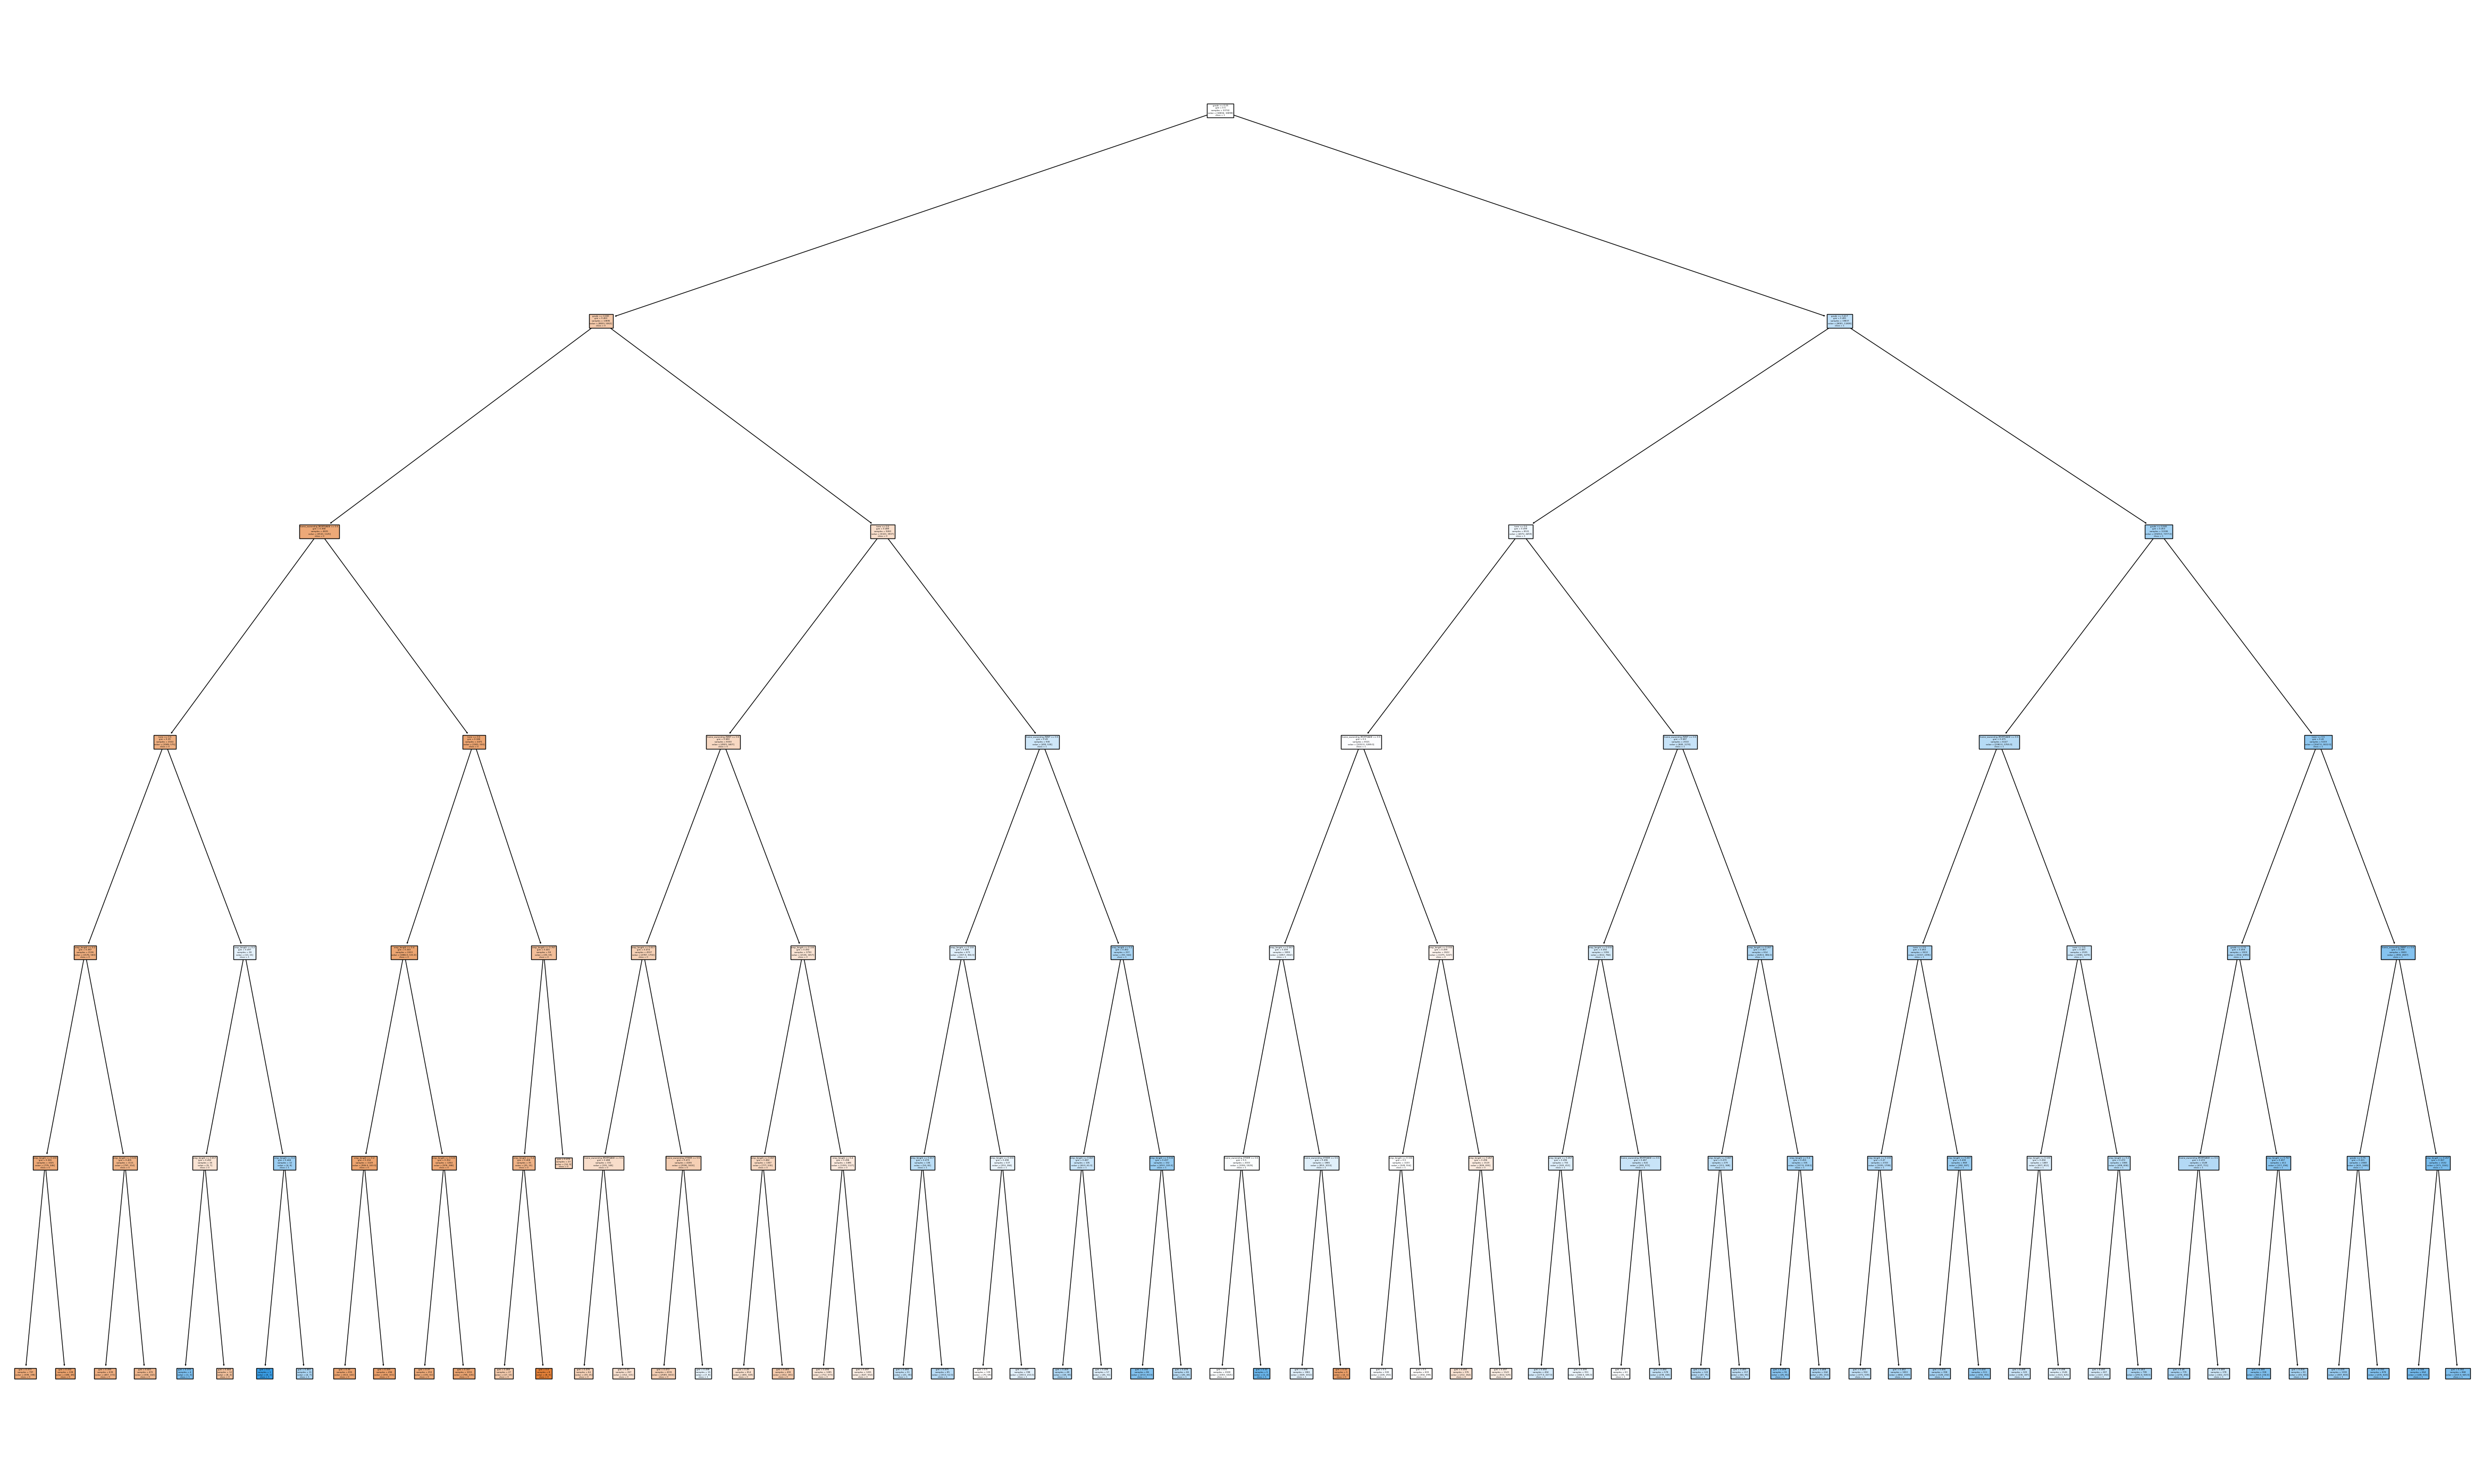

In [180]:
plt.figure(figsize=(60,36))
plot_tree(dt_model, 
        feature_names=x_train.columns, 
        class_names=["0", "1"],       
        filled=True
        )
plt.show()